# Introduction
In Part I, we collected three sets of data. These data came from different sources, and coming them requires a level of cleaning. 

This Part will push your cleaning skills to the limit, and hopefully you develop

In this notebook, you will do the following:
1. Import the pandas library
2. Read the downloaded CSVs as DataFrame
3. Study exploitable patterns in the data for cleaning
4. Merging the cleaned data
5. Export the cleaned DataFrame as a CSV

### Step 1: Import the following library
- pandas as pd

In [1]:
# Step 1: Import the library
import pandas as pd

### Step 2: Read the Intelligence and Size CSVs as DataFrame
Now that you've imported your library, time to read the CSVs and turn them into DataFrame.

You're free to use any variables, but make sure they make sense and you can refer to them easily!

P.S. If you encounter any encoding errors, make sure you saved your CSV as CSV with utf-8 encoding. If you haven't, don't worry, just redo.

In [2]:
# Step 2a: Read your first CSV (with the NaN filled)
In = pd.read_csv('/Users/sm/Desktop/CourseMaterials/dog_intelligence v2.csv')
In

,breed,classification,obey_rate,lower_reps,upper_reps
0,Border Collie,Brightest Dogs,95%,1,4
1,Poodle,Brightest Dogs,95%,1,4
2,German Shepherd,Brightest Dogs,95%,1,4
3,Golden Retriever,Brightest Dogs,95%,1,4
4,Doberman Pinscher,Brightest Dogs,95%,1,4
...,...,...,...,...,...
131,Borzoi,Lowest Degree of Working/Obedience Intelligence,0%,81,100
132,Chow Chow,Lowest Degree of Working/Obedience Intelligence,0%,81,100
133,Bulldog,Lowest Degree of Working/Obedience Intelligence,0%,81,100
134,Basenji,Lowest Degree of Working/Obedience Intelligence,0%,81,100


In [3]:
# Step 2b: Read your second CSV (dog size)
Size = pd.read_csv('/Users/sm/Desktop/CourseMaterials/BreedWeightChart.csv')
Size

,Breed,Weight Male,Weight Female
0,Affenpinschers,7-10 pounds,7-10 pounds
1,Afghan Hounds,50-60 pounds,50-60 pounds
2,Airedale Terriers,50-70 pounds,50-70 pounds
3,Akitas,100-130 pounds,70-100 pounds
4,Alaskan Malamutes,85 pounds,75 pounds
...,...,...,...
184,Whippets,25-40 pounds,25-40 pounds
185,Wirehaired Pointing Griffons,50-70 pounds,35 and 50 pounds
186,Wirehaired Vizslas,55-65 pounds,45-55 pounds
187,Xoloitzcuintli,"10-15 pounds (toy), 15-30 pounds (miniature), ...","10-15 pounds (toy), 15-30 pounds (miniature), ..."


### Step 3: Rename Intelligence DataFrame columns
If we're going to merge the DataFrames, we should have similar column names. However, it seems that your Intelligence DataFrame (referred to as Intelligence from now) is slightly different from the rest. 

Rename the columns by changing the case of the columns, i.e. 'breed' to "Breed" 

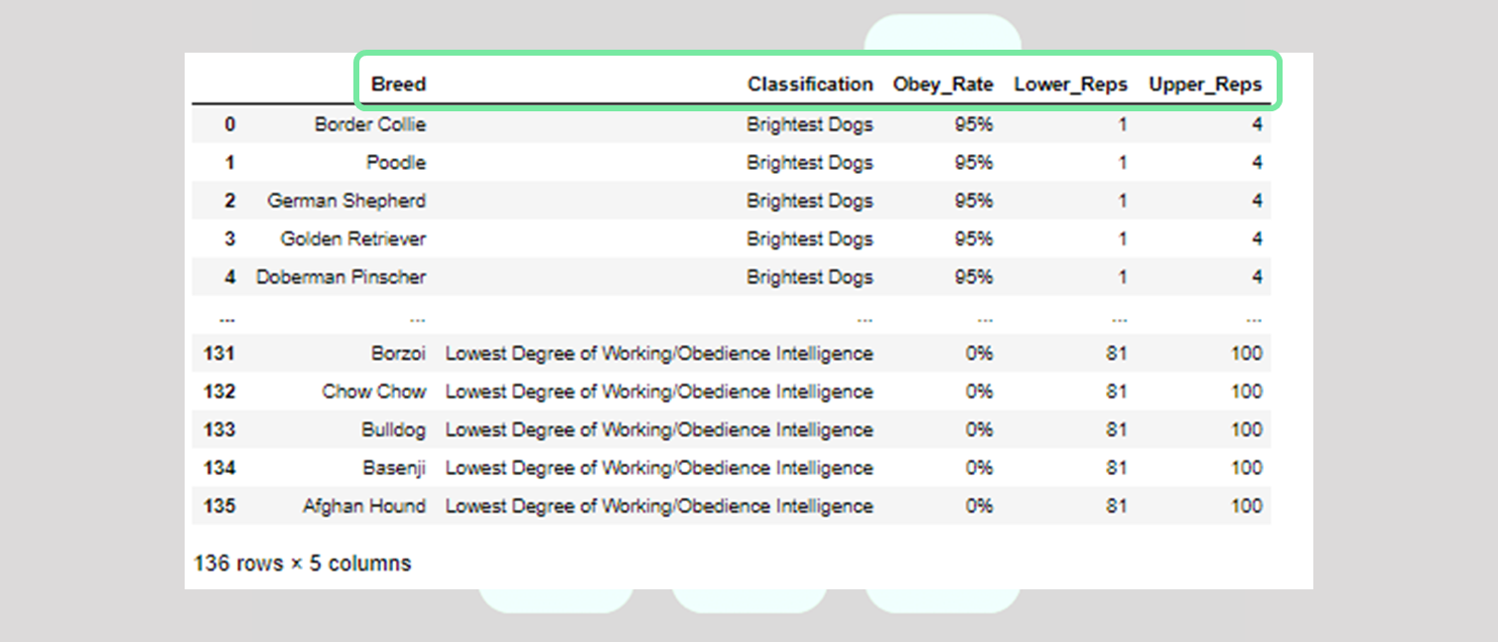

<strong>Hint: Google "renaming columns in pandas"</strong>

In [4]:
# Step 3: Rename your Intelligence columns
Size.rename(columns=str.lower, inplace=True)

### Step 4: Merge Intelligence DataFrame with Size DataFrame
Now that we've renamed the Intelligence column, let's do a merge between the Intelligence and Size DataFrame (Size) based on the column "Breed".

You'll see something like this:

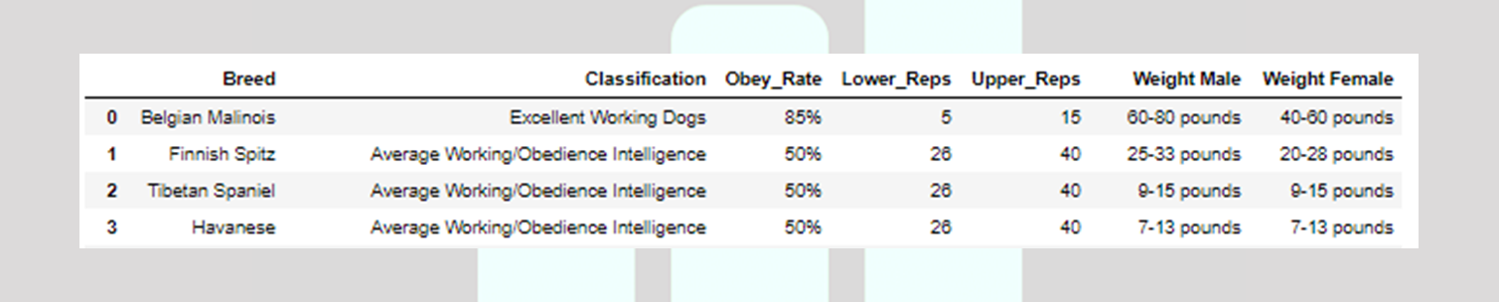

<strong>Hint: Google "merge two dataframe by column python"</strong>

In [13]:
# Step 4: Merge Intelligence with Size
M = pd.merge(In, Size, how='inner', on='breed')
M

,breed,classification,obey_rate,lower_reps,upper_reps,weight male,weight female
0,Belgian Malinois,Excellent Working Dogs,85%,5,15,60-80 pounds,40-60 pounds
1,Finnish Spitz,Average Working/Obedience Intelligence,50%,26,40,25-33 pounds,20-28 pounds
2,Tibetan Spaniel,Average Working/Obedience Intelligence,50%,26,40,9-15 pounds,9-15 pounds
3,Havanese,Average Working/Obedience Intelligence,50%,26,40,7-13 pounds,7-13 pounds
4,Shiba Inu,Average Working/Obedience Intelligence,50%,26,40,23 pounds,17 pounds
5,Maltese,Fair Working/Obedience Intelligence,30%,41,80,under 7 pounds,under 7 pounds
6,Chinese Crested,Fair Working/Obedience Intelligence,30%,41,80,8-12 pounds,8-12 pounds
7,Japanese Chin,Fair Working/Obedience Intelligence,30%,41,80,7-11 pounds,7-11 pounds
8,Great Pyrenees,Fair Working/Obedience Intelligence,30%,41,80,100 pounds & up,85 pounds & up
9,Shih Tzu,Lowest Degree of Working/Obedience Intelligence,0%,81,100,9-16 pounds,9-16 pounds


### Step 5: Examine the Intelligence and Size CSVs
We won't spoil the surprise here, but you're most likely having trouble with getting a full DataFrame. 

Let's look at our data to find out what's happening and hopefully troubleshoot it. 

Open up your two original CSVs and take a look at the breed names. 

What do you see?

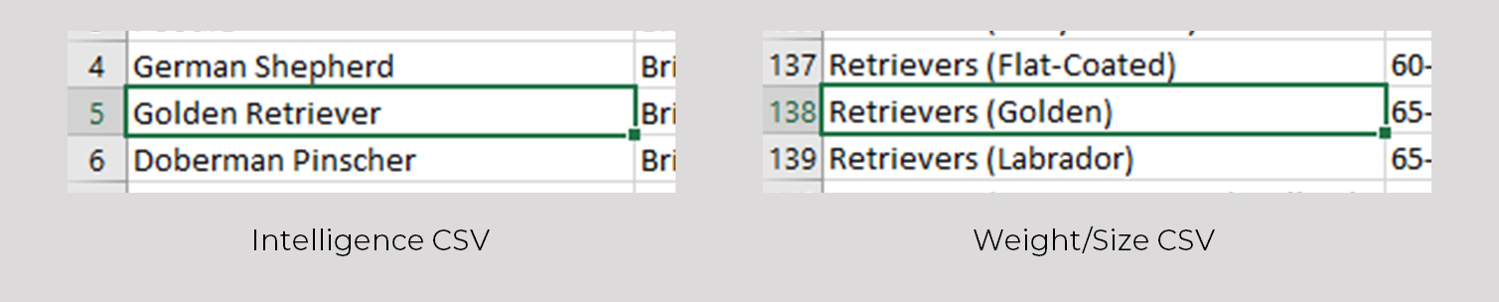

### Step 6: Come up with text cleaning strategies
Now that you know that the size CSV that you copied from the website is slightly off, leading to a poor merge.

This situation is not uncommon. You can anticipate encountering these problems when you're in a company, where you work with data from different departments. 

There's a few ways to solve this problem:
1. [Easy] Manually change the names of the dog breeds in the Size CSV 
2. [Medium] Exploit patterns in the text found in Size CSV and perform operations to change them 
3. [Hard] Perform fuzzy text matching 

Strategy 1 works here, since it's a small dataset. However, we'll work on Strategy 2 to flex some pattern recognition muscles, and an optional section on Strategy 3 to practise fuzzy text matching. 

## [Medium] Strategy 2: Exploit text patterns
In case you're wondering where Strategy 1 is, we're skipping that. It's a lot of work and not scalable! 
### Step 7: Observe the patterns in Size CSV
Generally, there are three main differences that prevent us from merging with the first DataFrame properly:

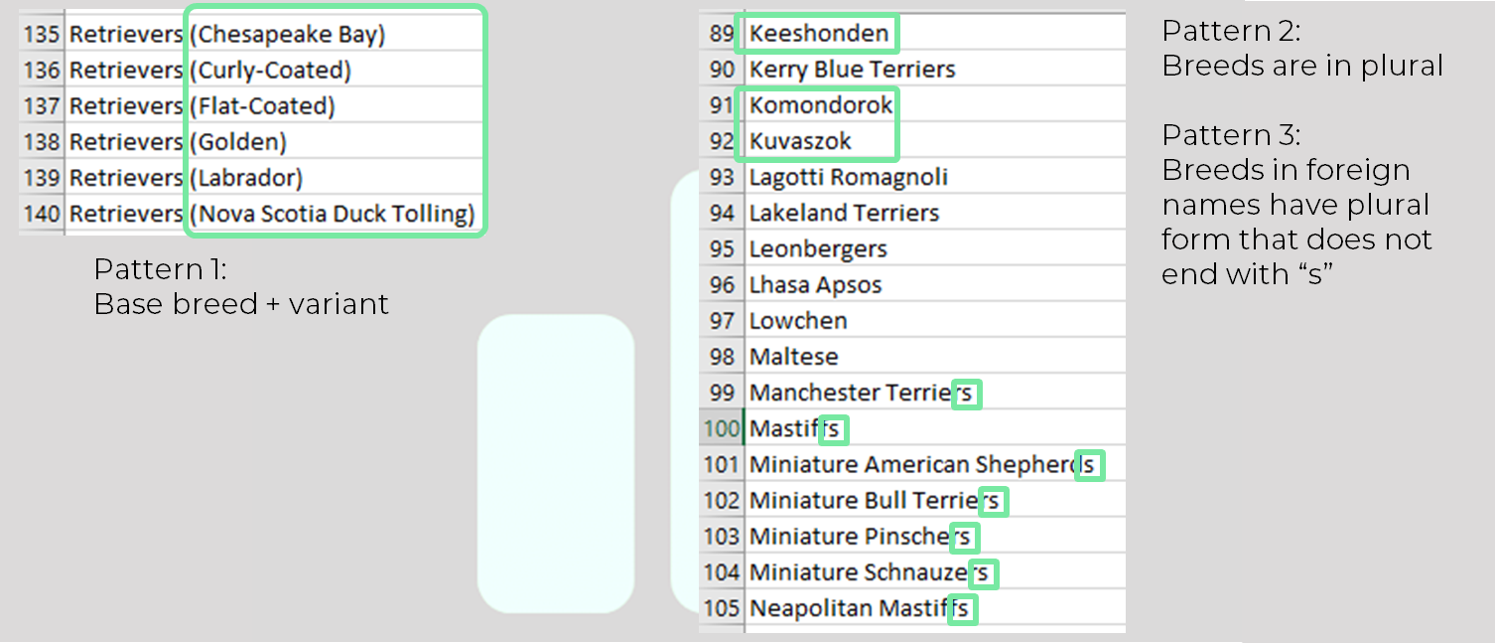

1. Pattern 1: Instead of Golden Retriever, you have Retrievers (Golden). We will need to remove the parentheses and swap it around
2. Pattern 2: The breeds are in plural whereas the Intelligence CSV is in a singular form, i.e. Manchester Terrier in Intelligence, but Manchester Terriers in Size
3. Pattern 3: The plural form for non-English breeds do not end with an s, and have a different form, e.g., Puli vs Pulik, Keeshond vs Keeshonden, Komondor vs Komondorok, etc.

### Step 8: Fix Pattern 1
Let's go back to the Size DataFrame, and see how we can edit it to match Intelligence. 

First up, let's fix Pattern 1, and shift the names in the brackers to the front.

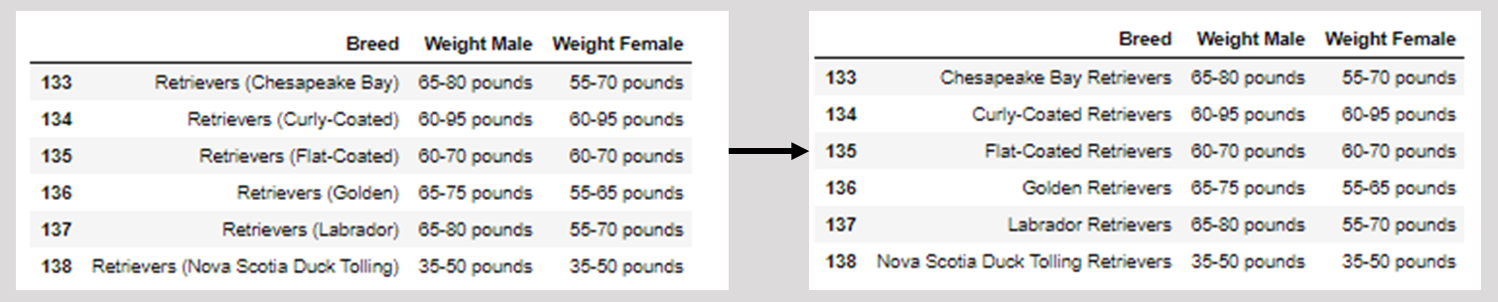

There are a few ways to do this but here's our suggestion if you're unsure:
1. Declare an empty list
2. Loop through the Breed column with a for loop
3. Check if there is parentheses in the value
4. If there isn't, append the existing value into the empty list
5. If there is, split the string and turn it into a list
6. Take the list from step 5, and concatenate the items but swap their positions
7. Append the concatenated string into the list from 1
8. Override the Breed column with your list

<font color = 'red'>Make sure that you do not have trailing spaces, and strip your strings if you must to remove empty characters.</font>

In [6]:
# Step 8: Fix Pattern 1
import re
L = []

for i in Size.breed:
    pattern = '\(*\)'
    if bool(re.search(pattern, i)):
        d = i.find("(")
        variant = re.sub("[()]","", i[d:]).strip()
        breed = i[:d].strip()
        S = variant + ' ' + breed
        L.append(S)
    else:
        L.append(i.strip())
 
Size1 = Size.copy()
Size1['breed'] = L

In [9]:
list(zip(*[Size['breed'],Size1['breed']]))

[('Affenpinschers', 'Affenpinschers'),
 ('Afghan Hounds', 'Afghan Hounds'),
 ('Airedale Terriers', 'Airedale Terriers'),
 ('Akitas', 'Akitas'),
 ('Alaskan Malamutes', 'Alaskan Malamutes'),
 ('American English Coonhounds', 'American English Coonhounds'),
 ('American Eskimo Dogs', 'American Eskimo Dogs'),
 ('American Foxhounds', 'American Foxhounds'),
 ('American Hairless Terriers', 'American Hairless Terriers'),
 ('American Staffordshire Terriers', 'American Staffordshire Terriers'),
 ('Anatolian Shepherd Dogs', 'Anatolian Shepherd Dogs'),
 ('Australian Cattle Dogs', 'Australian Cattle Dogs'),
 ('Australian Shepherds', 'Australian Shepherds'),
 ('Australian Terriers', 'Australian Terriers'),
 ('Basenjis', 'Basenjis'),
 ('Basset Hounds', 'Basset Hounds'),
 ('Beagles', 'Beagles'),
 ('Bearded Collies', 'Bearded Collies'),
 ('Beaucerons', 'Beaucerons'),
 ('Bedlington Terriers', 'Bedlington Terriers'),
 ('Belgian Malinois', 'Belgian Malinois'),
 ('Belgian Sheepdogs', 'Belgian Sheepdogs'),
 (

### Step 9: Fix Pattern 2
If you did the merge now, you'd still have the same number of rows in the resulting DataFrame. 

That's because we haven't fixed the second Pattern, which is that the breeds in Size are in plural with letter "s". 

We'll run a loop through "Breed" and remove the letter "s" if the value in the row contains a letter "s" at the end.

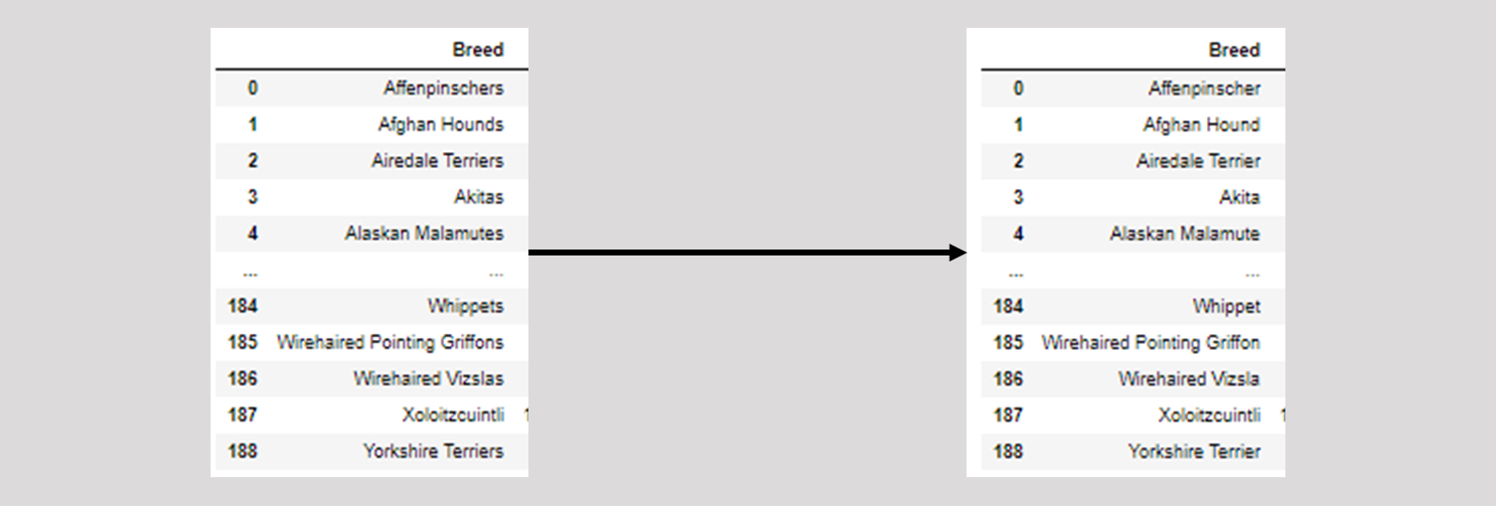

There are a few ways to do this, and here's a suggestion:
1. Declare an empty list
2. Loop through the Breed column with a for loop
3. Check if the row's value's last string is an "s"
4. If there isn't, append the existing value into the empty list
5. If there is, perform string slicing to get all the characters except the last one and append it into the list
6. Append the concatenated string into the list from 1
7. Override the Breed column with your list

In [10]:
# Step 9: Fix Pattern 2

L1 = []

for i in Size1.breed:
    pattern1 = 's$'
    if bool(re.search(pattern1, i)):
        L1.append(i[:-1].strip())
    else:
        L1.append(i.strip())
        
Size2 = Size1.copy()
Size2['breed'] = L1

In [11]:
list(zip(*[Size['breed'],Size2['breed']]))

[('Affenpinschers', 'Affenpinscher'),
 ('Afghan Hounds', 'Afghan Hound'),
 ('Airedale Terriers', 'Airedale Terrier'),
 ('Akitas', 'Akita'),
 ('Alaskan Malamutes', 'Alaskan Malamute'),
 ('American English Coonhounds', 'American English Coonhound'),
 ('American Eskimo Dogs', 'American Eskimo Dog'),
 ('American Foxhounds', 'American Foxhound'),
 ('American Hairless Terriers', 'American Hairless Terrier'),
 ('American Staffordshire Terriers', 'American Staffordshire Terrier'),
 ('Anatolian Shepherd Dogs', 'Anatolian Shepherd Dog'),
 ('Australian Cattle Dogs', 'Australian Cattle Dog'),
 ('Australian Shepherds', 'Australian Shepherd'),
 ('Australian Terriers', 'Australian Terrier'),
 ('Basenjis', 'Basenji'),
 ('Basset Hounds', 'Basset Hound'),
 ('Beagles', 'Beagle'),
 ('Bearded Collies', 'Bearded Collie'),
 ('Beaucerons', 'Beauceron'),
 ('Bedlington Terriers', 'Bedlington Terrier'),
 ('Belgian Malinois', 'Belgian Malinoi'),
 ('Belgian Sheepdogs', 'Belgian Sheepdog'),
 ('Belgian Tervuren', 'B

In [12]:
Size2.to_csv('BreedWeightChart v0.2.csv', index=None)

### Step 10: See what the difference is between "Breed" in Intelligence and Merged DataFrame
If you performed another merge, you would realize that you're only more than halfway there. Depending on how you fixed Pattern 2, you'll be getting anywhere between 98 to 110+ rows in the merged DataFrame. 

If you're getting fewer than 110 rows in your merged DataFrame, you will have to reexamine Step 8 and clean the values with parentheses. 

Before we go further, let's look at the differences between the Breed column in Merged and the original Intelligence DataFrame.

1. Declare a variable containing the merge between Intelligence and Breed (Merge)
2. Get the differences between the Breed in Merge and Intelligence

What you want is a list that tells you what's missing in Merge that's present in Intelligence.

<strong>Hint: Google "get difference between two lists python"</strong>

In [14]:
# Step 10a: Declare a variable containing merge between Intelligence and Size 
M1 = pd.merge(In, Size2, how='inner', on='breed')
M1

,breed,classification,obey_rate,lower_reps,upper_reps,weight male,weight female
0,Border Collie,Brightest Dogs,95%,1,4,30-55 pounds,30-55 pounds
1,Poodle,Brightest Dogs,95%,1,4,"4-6 pounds (toy), 10-15 pounds (miniature), 60...","4-6 pounds (toy), 10-15 pounds (miniature), 40..."
2,Golden Retriever,Brightest Dogs,95%,1,4,65-75 pounds,55-65 pounds
3,Doberman Pinscher,Brightest Dogs,95%,1,4,75-100 pounds,60-90 pounds
4,Shetland Sheepdog,Brightest Dogs,95%,1,4,15-25 pounds,15-25 pounds
...,...,...,...,...,...,...,...
110,Borzoi,Lowest Degree of Working/Obedience Intelligence,0%,81,100,75-105 pounds,60-85 pounds
111,Chow Chow,Lowest Degree of Working/Obedience Intelligence,0%,81,100,45-70 pounds,45-70 pounds
112,Bulldog,Lowest Degree of Working/Obedience Intelligence,0%,81,100,50 pounds,40 pounds
113,Basenji,Lowest Degree of Working/Obedience Intelligence,0%,81,100,24 pounds,22 pounds


In [15]:
# Step 10b: Get the differences between Intelligence and Intelligence x Size
set(In['breed']) - set(M1['breed'])

{'Australian Silky Terrier',
 'Belgian Malinois',
 'Belgian Shepherd Dog (Tervuren)',
 'Bichon Frise',
 'Bouvier des Flandres',
 'Chinese Shar Pei',
 'Cocker Spaniel',
 'Curly Coated Retriever',
 'Fox Terrier (Smooth)',
 'German Shepherd',
 'Great Pyrenees',
 'Griffon Bruxellois',
 'Jack Russell terrier',
 'Keeshond',
 'King Charles Spaniel',
 'Kuvasz',
 'Petit Basset Griffon Vendeen',
 'Puli',
 'Saint Bernard',
 'Siberian Husky',
 'Soft-coated Wheaten Terrier'}

### Step 11: Replace the remainder text manually 
By now, your list of breeds would be around 20 items long. You've done well! 

Usually, the fixes that you apply, when done correctly, will cover 80-90% of the cases. The remainders tend to be edge cases and outliers. 

For example, the remaining breeds which were recalcitrant to Pattern 1 and Pattern 2 fixes are due to them having foreign names. 

In the Size CSV, the dog breeds are in plural. This means foreign names such as:
1. Puli (singular in Intelligence) <-> Pulik (plural in Size)
2. Kuvasz (singular in Intelligence) <-> Kuvasz (plural in Size)

In addition, there are unexpected text format that were due to human decisions, such as:
1. Australian Silky Terrier (full name in Intelligence) <-> Silky Terrier (short name in Size)
2. Saint Bernard (name in Intelligence) <-> St. Bernard (abbreviated name in Size)

You'll have to manually replace the text in the Size DataFrame with the correct ones from Intelligence DataFrame.

It's time-consuming but welcome to data cleaning!

<font color = 'red'>Take your time here and be meticulous! Don't forget that there are names which lost their "s"</font>

In [16]:
# Step 11a: Replace the remaining breed values in Size manually to match the Intelligence
Size3 = pd.read_csv('/Users/sm/Desktop/CourseMaterials/BreedWeightChart v0.3.csv')

In [17]:
# Step 11b: Merge Intelligence and Size and examine the combined DataFrame
M2 = pd.merge(In, Size3, how='inner', on='breed')
M2

,breed,classification,obey_rate,lower_reps,upper_reps,weight male,weight female
0,Border Collie,Brightest Dogs,95%,1,4,30-55 pounds,30-55 pounds
1,Poodle,Brightest Dogs,95%,1,4,"4-6 pounds (toy), 10-15 pounds (miniature), 60...","4-6 pounds (toy), 10-15 pounds (miniature), 40..."
2,German Shepherd,Brightest Dogs,95%,1,4,110-150 pounds,80-120 pounds
3,Golden Retriever,Brightest Dogs,95%,1,4,65-75 pounds,55-65 pounds
4,Doberman Pinscher,Brightest Dogs,95%,1,4,75-100 pounds,60-90 pounds
...,...,...,...,...,...,...,...
129,Borzoi,Lowest Degree of Working/Obedience Intelligence,0%,81,100,75-105 pounds,60-85 pounds
130,Chow Chow,Lowest Degree of Working/Obedience Intelligence,0%,81,100,45-70 pounds,45-70 pounds
131,Bulldog,Lowest Degree of Working/Obedience Intelligence,0%,81,100,50 pounds,40 pounds
132,Basenji,Lowest Degree of Working/Obedience Intelligence,0%,81,100,24 pounds,22 pounds


If you did everything correctly, you should have 134 rows in the final merged DataFrame.

The remaining two breeds that do no have a match are:
1. Cocker Spaniel
2. King Charles Spaniel

That's because Intelligence CSV doesn't have information on (American) Cocker Spaniel and Size CSV doesn't have information on King Charles Spaniel.

As such, it's ok to leave these two rows behind. 

### Step 12: Export your merged DataFrame as CSV
Now that you're done with the merge and have 134 rows in your DataFrame, export the merged DataFrame as CSV.

In [18]:
# Step 12: Export the merged DataFrame as CSV
M2.to_csv('Mergedv0.1.csv', index=None)

### End of Part II
By now, you should have a CSV containing both Intelligence and Size data. 

Next in Part III, we will stitch the Intelliegence x Size data with Popularity data together.

## [Hard] Strategy 3: Fuzzy text matching
Fuzzy text matching is a kind of matching when the values do not match completely.

For example, you want to merge a column containing 'john Smith' with another column that contains 'John Smith'. Normally, this would not result in a merge since the strings do not match at all.

However, in fuzzy matching, these two columns will merge. 

We won't be using the results from fuzzy text matching, since it's not perfect compared to careful cleaning and leads to more work than necessary. 

However, it's still a good practice. You should visually inspect the results row by row to make sure that the fuzzy matching worked. 

<strong>Hint: Google "how to 'fuzzy' match strings when merge two dataframe in pandas"</strong>

In [68]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import numpy as np

def Match(wrong_options,correct_options):
    correct_array=[]
    ratio_array=[]    
    for wrong_option in wrong_options:
        if wrong_option in correct_options:
            correct_array.append(wrong_option)
            ratio_array.append('100')
        else:   
            x = process.extractOne(wrong_option,correct_options,scorer=fuzz.token_set_ratio, score_cutoff=80)
            correct_array.append(x[0] if x is not None else np.NaN)
            ratio_array.append(x[1] if x is not None else np.NaN)
    return correct_array, ratio_array

In [85]:
correct_array, ratio_array = Match(Size.breed, In.breed)
Size4 = Size.copy()
Size4['match_breed'] = correct_array
Size4['ratio'] = ratio_array
Size4

,breed,weight male,weight female,match_breed,ratio
0,Affenpinschers,7-10 pounds,7-10 pounds,Affenpinscher,96.0
1,Afghan Hounds,50-60 pounds,50-60 pounds,Afghan Hound,96.0
2,Airedale Terriers,50-70 pounds,50-70 pounds,Airedale Terrier,97.0
3,Akitas,100-130 pounds,70-100 pounds,Akita,91.0
4,Alaskan Malamutes,85 pounds,75 pounds,Alaskan Malamute,97.0
...,...,...,...,...,...
184,Whippets,25-40 pounds,25-40 pounds,Whippet,93.0
185,Wirehaired Pointing Griffons,50-70 pounds,35 and 50 pounds,Wirehaired Pointing Griffon,98.0
186,Wirehaired Vizslas,55-65 pounds,45-55 pounds,NaN,NaN
187,Xoloitzcuintli,"10-15 pounds (toy), 15-30 pounds (miniature), ...","10-15 pounds (toy), 15-30 pounds (miniature), ...",NaN,NaN


In [89]:
# check if there are values matched more than once
Size4[Size4.match_breed.duplicated(keep=False) & ~(Size4.match_breed.isna())]

,breed,weight male,weight female,match_breed,ratio
49,Cesky Terriers,14-24 pounds,14-24 pounds,Skye Terrier,85.0
61,Doberman Pinschers,75-100 pounds,60-90 pounds,Doberman Pinscher,97.0
71,German Pinschers,25-45 pounds,25-45 pounds,Doberman Pinscher,85.0
106,Norwegian Buhunds,31-40 pounds,26-35 pounds,Norwegian Elkhound,80.0
107,Norwegian Elkhounds,55 pounds,48 pounds,Norwegian Elkhound,97.0
156,Silky Terriers,around 10 pounds,around 10 pounds,Skye Terrier,85.0
157,Skye Terriers,35-45 pounds,slightly lighter,Skye Terrier,96.0


In [102]:
# sort by the token set ratio and keep the highest score
Size5 = Size4.sort_values(by='ratio', ascending=False)
Size5 = Size5.drop_duplicates(subset='match_breed', keep='first')
Size5

,breed,weight male,weight female,match_breed,ratio
96,Maltese,under 7 pounds,under 7 pounds,Maltese,100.0
20,Belgian Malinois,60-80 pounds,40-60 pounds,Belgian Malinois,100.0
72,German Shepherd Dogs,65-90 pounds,50-70 pounds,German Shepherd,100.0
80,Havanese,7-13 pounds,7-13 pounds,Havanese,100.0
67,Finnish Spitz,25-33 pounds,20-28 pounds,Finnish Spitz,100.0
...,...,...,...,...,...
127,Pugs,14-18 pounds,14-18 pounds,Pug,86.0
171,St. Bernards,140-180 pounds,120-140 pounds,Saint Bernard,83.0
141,Russell Terriers,9-15 pounds,9-15 pounds,Jack Russell terrier,83.0
40,Brussels Griffons,8-10 pounds,8-10 pounds,Griffon Bruxellois,80.0


In [104]:
# check if the highest score is kept
Size5.query("match_breed in ['Skye Terrier','Doberman Pinscher','Norwegian Elkhound']")

,breed,weight male,weight female,match_breed,ratio
107,Norwegian Elkhounds,55 pounds,48 pounds,Norwegian Elkhound,97.0
61,Doberman Pinschers,75-100 pounds,60-90 pounds,Doberman Pinscher,97.0
157,Skye Terriers,35-45 pounds,slightly lighter,Skye Terrier,96.0


In [106]:
M3 = pd.merge(In, Size5, how='inner', left_on='breed', right_on='match_breed')
M3

,breed_x,classification,obey_rate,lower_reps,upper_reps,breed_y,weight male,weight female,match_breed,ratio
0,Border Collie,Brightest Dogs,95%,1,4,Border Collies,30-55 pounds,30-55 pounds,Border Collie,96.0
1,Poodle,Brightest Dogs,95%,1,4,Poodles,"4-6 pounds (toy), 10-15 pounds (miniature), 60...","4-6 pounds (toy), 10-15 pounds (miniature), 40...",Poodle,92.0
2,German Shepherd,Brightest Dogs,95%,1,4,German Shepherd Dogs,65-90 pounds,50-70 pounds,German Shepherd,100.0
3,Golden Retriever,Brightest Dogs,95%,1,4,Retrievers (Golden),65-75 pounds,55-65 pounds,Golden Retriever,97.0
4,Doberman Pinscher,Brightest Dogs,95%,1,4,Doberman Pinschers,75-100 pounds,60-90 pounds,Doberman Pinscher,97.0
...,...,...,...,...,...,...,...,...,...,...
128,Borzoi,Lowest Degree of Working/Obedience Intelligence,0%,81,100,Borzois,75-105 pounds,60-85 pounds,Borzoi,92.0
129,Chow Chow,Lowest Degree of Working/Obedience Intelligence,0%,81,100,Chow Chows,45-70 pounds,45-70 pounds,Chow Chow,100.0
130,Bulldog,Lowest Degree of Working/Obedience Intelligence,0%,81,100,Bulldogs,50 pounds,40 pounds,Bulldog,93.0
131,Basenji,Lowest Degree of Working/Obedience Intelligence,0%,81,100,Basenjis,24 pounds,22 pounds,Basenji,93.0
